<a href="https://colab.research.google.com/github/rsavj/Project-YoutubeDataHarvesting/blob/main/Process_behind_youtube_api_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **UNDERSTANDING YOUTUBE API CREATION**

# Link to get youtube API : [youtube API](https://console.developers.google.com/project)

# clike here to know how to create youtube API : [API creating and enabling](https://drive.google.com/file/d/1YEOGHGL8iI9BnNK5VS4aycKa9IdVb_Xq/view?usp=share_link)


# **YOUTUBE API DATA**

# Here we have **API-KEY** , We want to know how youtube provides its data's via API and structure of getting data's

# Youtube API data documentation : [Youtube API Data](https://developers.google.com/youtube/v3)

# Click here to know how does API provides data : [Youtube API data Resources](https://drive.google.com/file/d/1wWV-jJM1onrZ9uF4RnoepFGwpEcgz-S-/view?usp=share_link)

# In the above video we have N - number of resources provided by youtube  API to fetch each specific data's
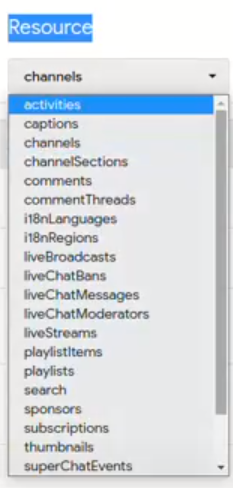

# On clicking the **LIST** --> ( </> ) this icon on down menu you will be provided with basic syntax **code** for more languages as we are in python phase on selecting **PYTHON** we can get basic code for a specific resource from youtube API

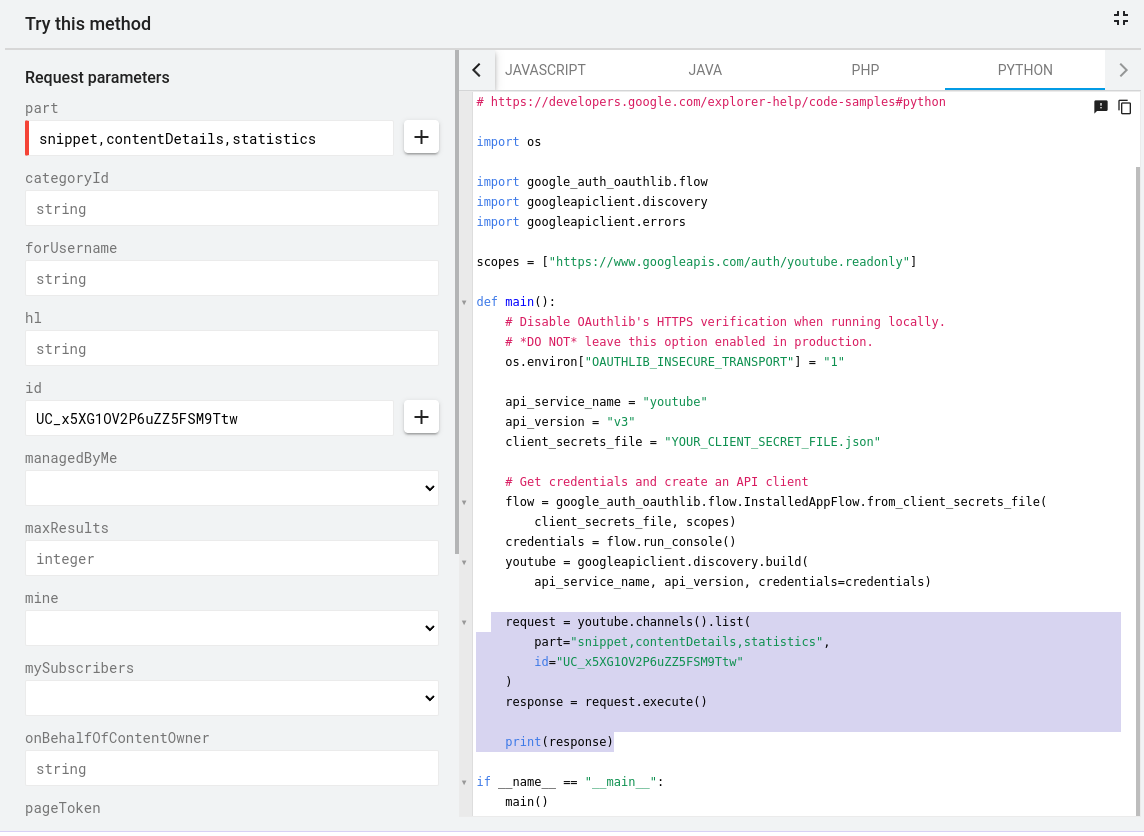

# **UNDERSTANDING THE SYNTAX OF RESOURCES AND API DATA's**

# As we saw the **Resources** menu provide many video data options like

*   channel
*   playlist
*   video
*   comment
*   livebroadcast
*   thumbnail ........etc

# In this selection we have to select the appropriate resource type for fetching the particular data ( Note : Individual resource for  particular data  eg: if we select 'channel' it give code syntax for channel data like channel name , channel id ..etc)






# **CREATING PARAMETERS FOR THE SYNTAX**

# For the **ACTIVATION** of resource we need **Two parameters** (  youtube  ,  channel_ID ) and **googlapiclient** python library



```
pip install google-api-client

from googleapiclient.discovery import build
```

# This **build** connects youtube data and api key as one parameter



```
api_key = '**YOUR API KEY**'
youtube = build('youtube', 'v3', developerKey=api_key)
```

# So **youtube** is ready next channel_ID ...,

# Select a particular channel on youtube in the channel webpage **right click on mouse > view page resource** click on **ctrl+f** for find option there you will search for **channelId** there you find an ID like this **'UCiEmtpFVJjpvdhsQ2QAhxVA'**





# **HOW TO GET THE DATA FROM SYNTAX**

# So we got the required parameters .. , so we may pass it to get data



```
from googleapiclient.discovery import build

api_key = '**YOUR API KEY**'
youtube = googleapiclient.discovery.build("youtube", "v3", developerKey=api_key)
channel_id = 'UCiEmtpFVJjpvdhsQ2QAhxVA'  # example channel_ID

# selected **channel** from resource menu

response = youtube.channels().list(
    id=channel_id,
    part='snippet,statistics,contentDetails'
)

channel_data = response.execute()


```
#**WHAT IS PART?**

#**snippet** : includes basic details about the channel, such as its title, description, and thumbnail image.
#**statistics** : includes information about the channel's performance and engagement, such as the number of subscribers, views, and comments.
#**contentDetails**: includes additional information about the channel's content, such as the uploads playlist and the channel's featured channels.

# The above code **channel_data** provides a dictionary of channel_data which has a key value pair's like this



```
print(channel_data.keys())

-->> Output:  dict_keys(['kind', 'etag', 'pageInfo', 'items'])
```
#In this keys **ITEMS** has the channel information so..,

```
print(channel_data['items']

-->> Output : [{
                  "kind": "youtube#channel",
                  "etag": "NfPKDU4f-Kk4KDRDwnGoNscB7LQ",
                  "id": "UCiEmtpFVJjpvdhsQ2QAhxVA",
                  **snippet**: {
                      "title": "channel_name",
                      "description": "channel_description",
                      "customUrl": " @customer_url",
                      "publishedAt": "channel_publish_date",
                      "thumbnails": { "channel_thumbnail" },
                      "localized": {
                      "title": "",
                      "description": ""
                      },
                      "country": " "},

                      **contentDetail**: { {'relatedPlaylists': {'likes': '',
                      'uploads': 'UUiEmtpFVJjpvdhsQ2QAhxVA'}},
                      
                      **statistics**: {'viewCount': '',
                      'subscriberCount': '',
                      'hiddenSubscriberCount': ,
                      'videoCount': ''}}]}
            

```

# So is  that simple to get data of channel using channel id , we can use key itration to get data like this

```
channel_informations = {
  'channel_name' : channels_data['items'][0]['snippet']['title'],
  'channel_description' : channels_response['items'][0]['snippet']['description'],
  'playlists' : channels_response['items'][0]['contentDetails']['relatedPlaylists']['uploads'] }
  
  # you have to fetch respectively more informative data's and create an dictionary for easy access

  print(channel_informations)

  -->> Output : channel_information {
                                        channel_name : **selected channel_name**,
                                        channel _description : ** description **,
                                        playlists : ** overall playlist_ID ** }

```


# **VIDEO DATA's OF SELECTED CHANNEL**

# We no having the channel information including **PLAYLIST_ID** , this will help us to get all **VIDEO_ID's** of channel to fetch all video data ... ( quite complicating but see the syntax for better vision )
```
                                    CHANNEL_ID ( UCiEmtpFVJjpvdhsQ2QAhxVA )
                                        |
                                        |

                                    PLAYLIST_ID (UUiEmtpFVJjpvdhsQ2QAhxVA)
                                        |
                                        |
                      ---------------------------------------------
                      |               |           |               |
                  VIDEO_ID(1)    VIDEO_ID(2)    VIDEO_ID(3)      VIDEO_ID(4)
                ("dQw4w9WgXcQ")("9bZkp7q19f0") ("j5-yKhDd64s")  ("QH2-TGUlwu4")


```

# So the above syntax show that if we got **CHANNEL_ID** -- > We have **PLAYLIST_ID** and the we can get all the **VIDEO_ID** of each video's in the channel so we can have our video data easily from the **RESOURCE -->> VIDEO -->> SYNTAX**

# Similarly to channel syntax we can get all the **VIDEO_ID** of each video's in the channel amd we can use video syntax to fetch all the video details in loop


```

for item in playlist_videos:
            video_id = item['snippet']['resourceId']['videoId']
            video_response = youtube.videos().list(
                part='snippet,statistics,contentDetails',
                id=video_id
            ).execute()
            
            if video_response['items']:
                video_information = {
                    "Video_Id": video_id,
                    "Video_Name": video_response['items'][0]['snippet']['title'] if 'title' in video_response['items'][0]['snippet'] else "Not Available",
                    "Video_Description": video_response['items'][0]['snippet']['description'],}

```

# created an looping response for video_info . But don't forgort to understant about **nextpagetoken** to loop through all the pages of video's in the channel


# **COMMENTS**

# An important phase for each video's data , but how to get that for each video and how to integrate it with video_information

# We have **Resource** syntax to get comments and using proper looping method also we can place the comments in respective video's

```
for comment in comments_response['items']:
                      comment_information = {
                          "Comment_Id": comment['snippet']['topLevelComment']['id'],
                          "Comment_Text": comment['snippet']['topLevelComment']['snippet']['textDisplay'],
                          "Comment_Author": comment['snippet']['topLevelComment']['snippet']['authorDisplayName'],
                          "Comment_PublishedAt": comment['snippet']['topLevelComment']['snippet']['publishedAt']
                      }
                      video_information['Comments'][comment_information['Comment_Id']] = comment_information

                  videos[video_id] = video_information

```
# In this we can have our comment_information of video with that we can make change of video_information to this ....

```
video_information = {
                    "Video_Id": video_id,
                    "Video_Name": video_response['items'][0]['snippet']['title']
                    "Video_Description": video_response['items'][0]['snippet']['description'],
                    "comment_information":{}
                    }

```


# As we done with proper **Intending** technique's and **nextpagetoken** to loop through all the pages to get all the data's


# **THE RESULT**



```
#Example format : {
                    "Channel_Name": {
                        "Channel_Name": "Example Channel",
                        "Channel_Id": "UC1234567890",
                        "Subscription_Count": 10000,
                        "Channel_Views": 1000000,
                        "Channel_Description": "This is an example channel.",
                        "Playlist_Id": "PL1234567890"
                        },
                    "Video_Id_1": {
                        "Video_Id": "V1234567890",
                        "Video_Name": "Example Video 1",
                        "Video_Description": "This is an example video.",
                        "Tags": ["example", "video"],
                        "PublishedAt": "2022-01-01T00:00:00Z",
                        "View_Count": 1000,
                        "Like_Count": 100,
                        "Dislike_Count": 10,
                        "Favorite_Count": 5,
                        "Comment_Count": 20,
                        "Duration": "00:05:00",
                        "Thumbnail": "https://example.com/thumbnail.jpg",
                        "Caption_Status": "Available",
                  "Comments": {
                      "Comment_Id_1": {
                          "Comment_Id": "C1234567890",
                          "Comment_Text": "This is a comment.",
                          "Comment_Author": "Example User",
                          "Comment_PublishedAt": "2022-01-01T00:01:00Z"
                      },
                      "Comment_Id_2": {
                          "Comment_Id": "C2345678901",
                          "Comment_Text": "This is another comment.",
                          "Comment_Author": "Another User",
                          "Comment_PublishedAt": "2022-01-01T00:02:00Z"
                      }
                  }
              },

```
#So make sure the syntax like this and convert the data in **JSON** format then, go for **MONGODB** updation process....
